<a href="https://colab.research.google.com/github/Pornchita2541/Multivariate/blob/main/%E0%B8%AA%E0%B8%AD%E0%B8%9A%E0%B8%9B%E0%B8%A5%E0%B8%B2%E0%B8%A2%E0%B8%A0%E0%B8%B2%E0%B8%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
import pandas as pd

In [2]:
Name = 'พรชิตา แสนจันทร์'
ID = '603021828-5'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

021:22:13


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.753628,-1.025994,-5.952946,-0.400472,6.799086,7.113557,1.559397,9.424892,-6.620534,1.503246,-8.336819,-6.869254,-0.941849,3.779754,-3.724184,2.044814,7.756093,6.770531,1.302341,4.464965,-1.980008,2.484954,-2.051989,14.424771
1,-0.406066,-4.990092,7.309898,-2.972503,-5.321833,-4.422716,2.401294,-5.792368,-5.678925,5.805411,2.157975,6.389343,7.792260,-4.714322,1.959602,-7.166392,7.620671,6.508650,3.228711,-6.562059,8.622149,-8.245622,-9.980184,-39.228112
2,-3.744933,-3.480937,-9.227205,7.087691,6.545563,7.950522,8.633959,-8.946822,8.130434,-7.446542,9.981436,4.757383,7.643014,4.933556,7.711823,5.000035,7.961539,-9.364339,3.651569,7.232914,7.921016,-9.416149,-6.961873,-45.080747
3,10.013564,6.630884,2.007275,-0.697779,8.702782,2.804571,-10.116233,2.961177,0.213988,0.079192,-0.001249,-3.793305,-4.537488,4.974167,3.239741,-6.347649,6.271382,5.176364,5.950714,-4.921763,-3.909779,-4.697175,13.261768,-21.485877
4,1.928254,-4.101280,-1.721024,-5.418081,-9.189113,5.237051,4.085843,-8.798299,-4.952839,-4.194099,4.983857,-1.180567,-1.199833,-3.460760,1.957475,8.558564,9.340650,-8.856825,-0.843829,-9.522416,6.826698,4.407135,-8.202561,24.035674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.557160,8.750409,-3.806598,4.660577,9.525657,2.533091,-4.833330,9.897642,-1.633843,8.932021,-8.232509,9.334778,3.937638,-10.007822,3.571218,-3.765515,-0.244325,-1.556678,-8.211115,6.106192,11.497584,1.575652,17.500817,9.878261
9996,6.699291,-1.067502,5.385884,6.435232,5.357716,7.031969,4.234862,-1.799274,-3.448120,6.113983,-5.703465,-3.295631,-5.776246,1.241216,7.677021,-4.283344,7.284623,7.929664,2.893910,-3.342555,6.219801,-0.685775,-2.135004,-1.428873
9997,4.287949,-0.627294,7.709861,3.167397,-6.658936,-5.596329,7.394752,-3.651045,-1.395186,-8.872767,3.532006,4.955257,8.291748,-5.823316,7.279068,-8.430987,-0.768754,-2.188961,0.102604,0.003926,1.140420,1.856363,-1.254588,11.281813
9998,9.093126,-4.949346,-3.852101,6.727662,-4.630706,3.074760,8.358431,-8.279913,5.322937,-9.499148,0.488962,-1.874346,3.886551,5.288563,-9.829219,-8.956823,2.770698,4.135902,-7.209421,0.865682,-6.908635,-1.107784,-9.898693,-3.538922


ตัดข้อมูลที่มีค่า corre ซ้ำกันออก

In [6]:
corr = np.corrcoef(Data.to_numpy().T)

ดูขนาดของ corre

In [7]:
corr.shape 

(24, 24)

In [8]:
corr

array([[ 1.00000000e+00,  1.40347297e-01,  6.24088908e-02,
         1.95282774e-01,  3.18783502e-02,  3.61667750e-01,
        -2.34337915e-02, -9.91110752e-02,  2.49858130e-01,
        -1.93212121e-01,  6.75166683e-03, -2.65887969e-01,
        -6.84737178e-02,  3.28158549e-01,  1.64562152e-02,
        -4.72630661e-01, -3.30788446e-01, -1.27850870e-01,
        -2.29979434e-01, -3.02612449e-01, -3.42681500e-01,
        -9.48352747e-02,  1.40347297e-01, -9.48352747e-02],
       [ 1.40347297e-01,  1.00000000e+00,  1.77134060e-01,
         4.66743190e-02,  3.69545006e-01, -8.03370519e-02,
        -6.79987926e-01,  5.55269025e-01, -2.43837004e-01,
         1.51106628e-01, -3.85451526e-01, -3.25556212e-01,
         3.68505854e-02, -6.30494129e-02,  1.29609714e-01,
        -3.63192400e-01, -5.31900709e-01, -3.49983774e-02,
        -3.00169867e-01,  8.05961270e-02, -1.63817857e-01,
         3.48380759e-01,  1.00000000e+00,  3.48380759e-01],
       [ 6.24088908e-02,  1.77134060e-01,  1.00000000e

In [9]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 

row = 1 column = 22 corrcoef = 1.0
row = 21 column = 23 corrcoef = 1.0
row = 22 column = 1 corrcoef = 1.0
row = 23 column = 21 corrcoef = 1.0


In [10]:
DataD = Data.iloc[:,1:21]
DataD

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-1.025994,-5.952946,-0.400472,6.799086,7.113557,1.559397,9.424892,-6.620534,1.503246,-8.336819,-6.869254,-0.941849,3.779754,-3.724184,2.044814,7.756093,6.770531,1.302341,4.464965,-1.980008
1,-4.990092,7.309898,-2.972503,-5.321833,-4.422716,2.401294,-5.792368,-5.678925,5.805411,2.157975,6.389343,7.792260,-4.714322,1.959602,-7.166392,7.620671,6.508650,3.228711,-6.562059,8.622149
2,-3.480937,-9.227205,7.087691,6.545563,7.950522,8.633959,-8.946822,8.130434,-7.446542,9.981436,4.757383,7.643014,4.933556,7.711823,5.000035,7.961539,-9.364339,3.651569,7.232914,7.921016
3,6.630884,2.007275,-0.697779,8.702782,2.804571,-10.116233,2.961177,0.213988,0.079192,-0.001249,-3.793305,-4.537488,4.974167,3.239741,-6.347649,6.271382,5.176364,5.950714,-4.921763,-3.909779
4,-4.101280,-1.721024,-5.418081,-9.189113,5.237051,4.085843,-8.798299,-4.952839,-4.194099,4.983857,-1.180567,-1.199833,-3.460760,1.957475,8.558564,9.340650,-8.856825,-0.843829,-9.522416,6.826698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.750409,-3.806598,4.660577,9.525657,2.533091,-4.833330,9.897642,-1.633843,8.932021,-8.232509,9.334778,3.937638,-10.007822,3.571218,-3.765515,-0.244325,-1.556678,-8.211115,6.106192,11.497584
9996,-1.067502,5.385884,6.435232,5.357716,7.031969,4.234862,-1.799274,-3.448120,6.113983,-5.703465,-3.295631,-5.776246,1.241216,7.677021,-4.283344,7.284623,7.929664,2.893910,-3.342555,6.219801
9997,-0.627294,7.709861,3.167397,-6.658936,-5.596329,7.394752,-3.651045,-1.395186,-8.872767,3.532006,4.955257,8.291748,-5.823316,7.279068,-8.430987,-0.768754,-2.188961,0.102604,0.003926,1.140420
9998,-4.949346,-3.852101,6.727662,-4.630706,3.074760,8.358431,-8.279913,5.322937,-9.499148,0.488962,-1.874346,3.886551,5.288563,-9.829219,-8.956823,2.770698,4.135902,-7.209421,0.865682,-6.908635


In [11]:
DataD.shape

(10000, 20)

# 2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

## Kmean

### Import

In [12]:
from sklearn.cluster import KMeans

### Define

In [13]:
kmeans = KMeans(n_clusters=10, random_state=2021)

### Fit - Transform

คำนวณหาจุด cluter centers ของข้อมูล Data ด้วยวิธี K-means clustering

In [14]:
kmeans.fit(DataD)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [15]:
kmeans.cluster_centers_

array([[ 3.12740848, -2.06903511,  1.93728963, -1.36616182, -6.98754537,
         7.02432712, -2.80925393, -7.97357147, -9.27016056, -0.90756412,
        -7.42385755,  4.07041916, -8.70921394, -9.92175592, -8.2569733 ,
         6.0816352 ,  4.06618821,  7.23144811,  6.00780363, -5.35210544],
       [ 0.60217221,  7.21880503,  2.02671095, -4.12787787, -5.39686336,
         2.122288  , -3.82693428, -3.49593766, -0.76591106,  1.45512584,
         1.76218609,  7.28666061, -2.00336711,  4.95353902, -6.18302031,
         2.98290795,  2.28345283,  0.71314522, -2.52279536,  5.37677317],
       [-4.20338028,  4.43760642, -9.55192163, -5.85505346, -9.01900041,
        -4.01818017,  3.30931433, -3.7745782 ,  1.68396156, -8.58256164,
         7.40168132, -7.330145  , -6.36524493, -0.12610832,  7.3613329 ,
         5.19464863,  9.40611585,  5.16972008, -2.29941805, -1.83378359],
       [-3.86742834, -8.8112807 ,  7.93738095,  8.2304598 ,  9.07578978,
         8.33102765, -9.37712309,  7.51822814, -

ทำสอบการจัดกลุ่มของ Data

In [16]:
y = kmeans.predict(DataD)
y

array([5, 1, 3, ..., 1, 7, 4], dtype=int32)

### Visualize 

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
new_pca = pca.fit_transform(DataD)
from matplotlib import pyplot as plt
import matplotlib 

In [18]:
matplotlib.rcParams['figure.figsize']=[20,20] 

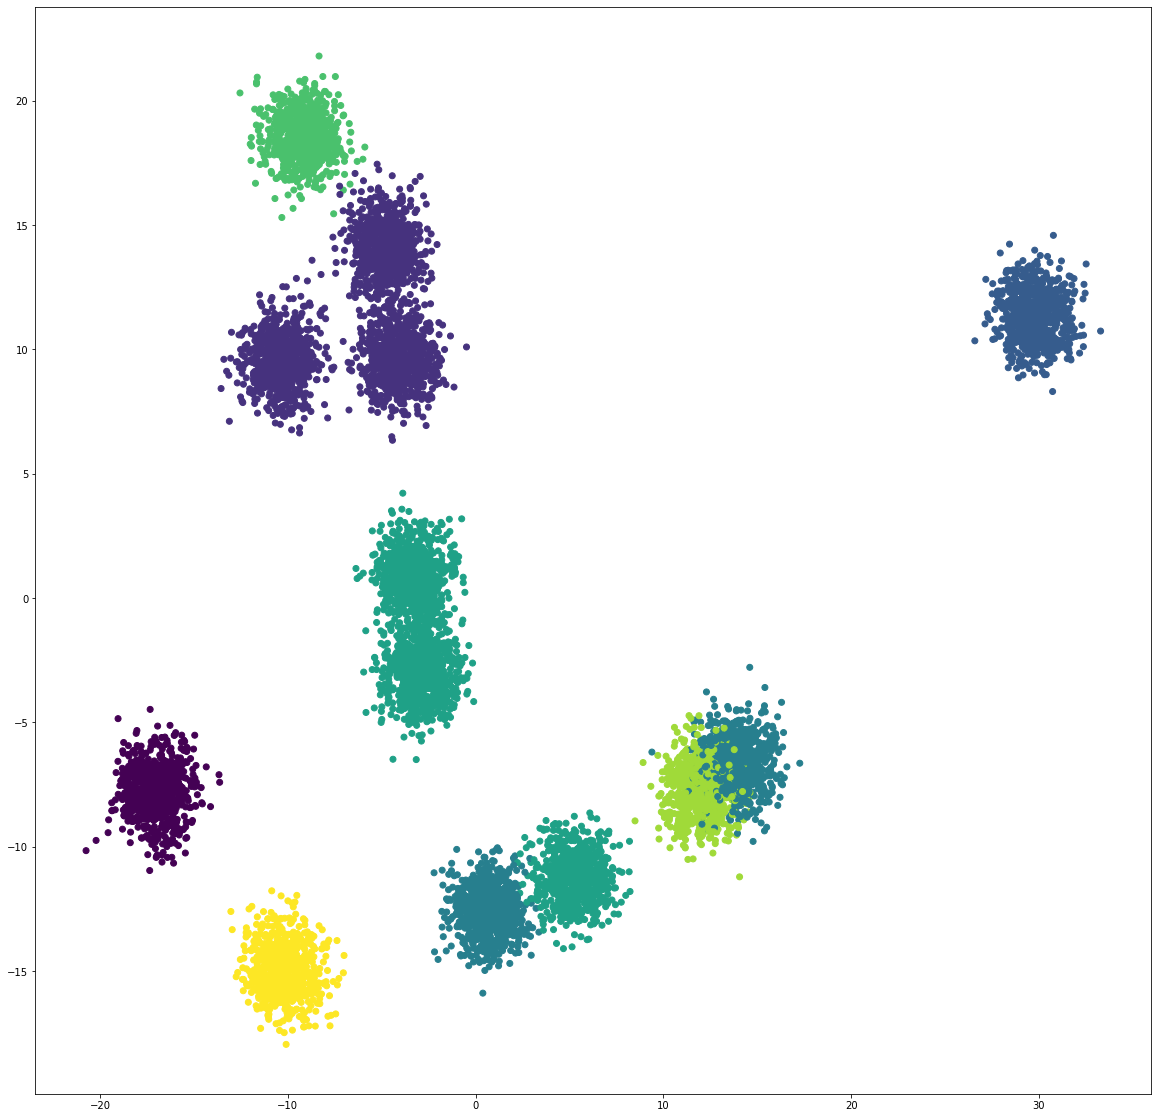

In [19]:
kmeans = KMeans(random_state=2021)
kmeans.fit(DataD)
a = kmeans.predict(DataD)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)

จากกราฟจะเห็นได้ว่า มีทั้งหมด 8 กลุ่ม ซึ่งสังเกตุจากสีที่แตกต่างกัน




### หาค่า k จากวิธี The elbow method

SSE

In [20]:
kmeans.inertia_ 

1678657.2653127643

In [21]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(DataD)
  SSE.append(kmeans.inertia_)

In [22]:
SSE

[6595399.012326848,
 5442169.375947121,
 4490721.114313453,
 3812205.1468346594,
 3163086.3756757793,
 2677689.898713189,
 2221388.0132435337,
 1678657.2653127643]

Text(0, 0.5, 'SSE')

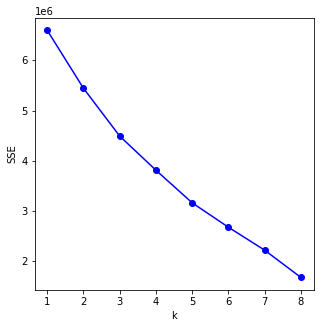

In [23]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE')

จากกราฟจะเห็นได้ว่ามีทั้งหมด 2 กลุ่ม ที่มีมุมหัก ดังนั้นจึงกำหนดให้ K=2

Text(0, 0.5, 'Y')

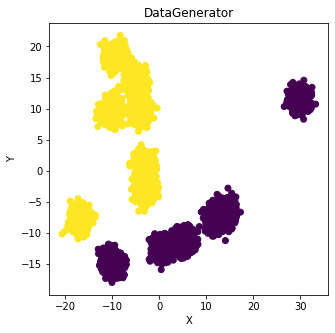

In [24]:
kmeans = KMeans(n_clusters=2,random_state=2021)
kmeans.fit(DataD)
a = kmeans.predict(DataD)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

## หาค่า k จากวิธี Silhouette coefficient (ค่าสัมประสิทธิ์ภาพเงา)

In [25]:
from sklearn import metrics 

In [26]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(DataD)
  score = metrics.silhouette_score(Data,kmeans.labels_)
  SilH.append(score)

Text(0, 0.5, 'SilH')

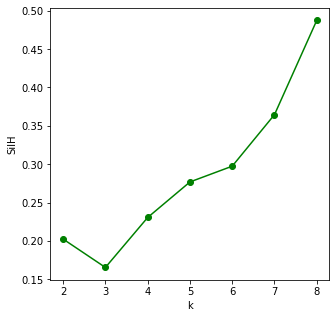

In [27]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH')

จากกราฟจะเห็นได้ว่ามี k ทั้งหมด 2 กลุ่ม โดยมีระยะห่างระหว่างจุดที่แตกต่างกันทั้งหมด 2 ช่วง คือ  3, 6

Text(0, 0.5, 'Y')

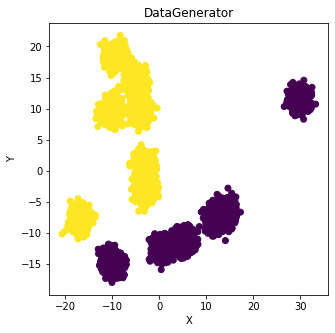

In [28]:
kmeans = KMeans(n_clusters=2,random_state=2021)
kmeans.fit(DataD)
a = kmeans.predict(DataD)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

## 2. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

In [29]:
from sklearn.manifold import MDS 

In [30]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(Data)

Text(0, 0.5, 'Y')

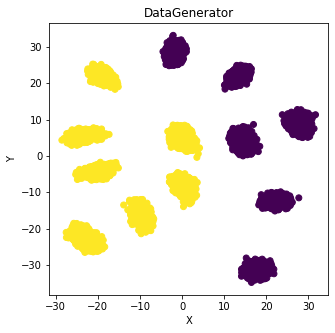

In [32]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(DataD)
b = kmeans2.predict(DataD)
plt.scatter(new_mds[:,0],new_mds[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

## 3. เปรียบเทียบความแตกต่างระหว่าง 1 กับ 2

Text(0, 0.5, 'Y')

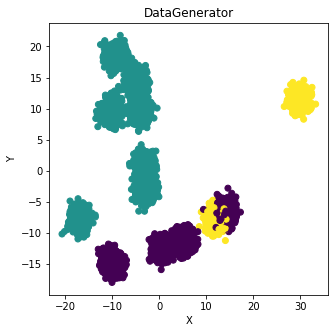

In [33]:
kmeans = KMeans(n_clusters=3,random_state=2021) # กำหนด k = 3 
kmeans.fit(DataD)
a = kmeans.predict(DataD)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

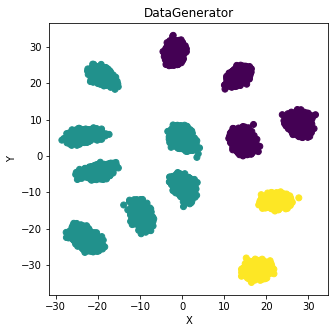

In [34]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(DataD)
b = kmeans2.predict(DataD)
plt.scatter(new_mds[:,0],new_mds[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')